### Example Model of HandWriting Digits

In [3]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [4]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), v_ys)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # change type from Boolean -> Float
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    inital = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(inital)

def bias_variable(shape):
    inital = tf.constant(0.1, shape=shape)
    return tf.Variable(inital)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [5]:
# define placeholder for inputs to network

xs = tf.placeholder(tf.float32, [None, 784]) # 28x28

# transfer label to one_hot
ys = tf.placeholder(tf.int32, [None])
yss = tf.one_hot(ys, depth = 10)

keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])

In [6]:
## conv1 layer ##
W_conv1 = weight_variable([5, 5, 1, 32]) #patch 5x5, in channel size 1, out size 32
## pool1 layer ##
b_conv1 = bias_variable([32])
#Combine
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) #output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1) #output size 14x14x32

In [7]:
## conv2 layer ##
W_conv2 = weight_variable([5, 5, 32, 64]) #patch 5x5, in channel size 32, out size 64
## pool2 layer ##
b_conv2 = bias_variable([64])
#Combine
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) #output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2) #output size 7x7x64

In [8]:
## fc1 layer ##

W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64]) #[n_samples, 7,7,64]  => [n_samples, 7*7*64]

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## output layer ##

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(yss * tf.log(prediction),
                                              reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob:0.5})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))

0.0565
0.7928
0.8876
0.9122
0.9249
0.9344
0.9406
0.9452
0.9494
0.9532
0.957
0.9577
0.9609
0.9614
0.9625
0.9626
0.9663
0.9665
0.9704
0.9704


In [271]:
#-------- End ---------------------------------

In [15]:
# read and transform images of box 

import cv2
import numpy as np
import skimage
import os
from skimage import io


In [217]:
# Read Normal Boxes

In [207]:
# read dir path
filepaths = []

for i in ["boxes","packages","paper_boxes"]:
    folder = "/Users/tunchiehhsu/Desktop/googliser/googliser/" + i
    for file in os.listdir(folder):
            if file != ".DS_Store":
                filepath = os.path.join(folder, file)
                filepaths.append(filepath)
x_normal = []
for path in filepaths:
    # gray scale
    img = io.imread(path,as_gray = True)
    # reshape to uniform size
    reshape_img = cv2.resize(img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
    x_normal.append(reshape_img.flatten())
x_normal = np.array(x_normal) # trans to Array 

In [208]:
len(filepaths) # Amt of normal boxes

366

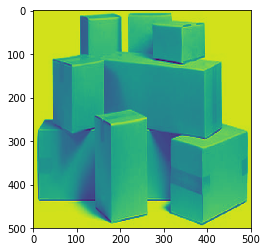

In [212]:
plt.imshow(x_normal[100].reshape([500,500]));


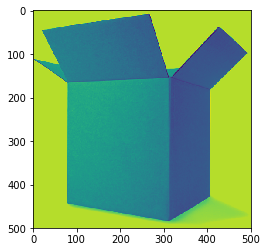

In [213]:
plt.imshow(x_normal[1].reshape([500,500]));

In [ ]:
# Read Smashed Boxes

In [219]:
# read dir path
filepaths = []
for i in ["broken_boxes","damaged_boxes","damaged_packages","smashed_boxes"]:
    folder = "/Users/tunchiehhsu/Desktop/googliser/googliser/" + i
    for file in os.listdir(folder):
            if file != ".DS_Store":
                filepath = os.path.join(folder, file)
                filepaths.append(filepath)
x_smashed = []
for path in filepaths:
    # gray scale
    img = io.imread(path,as_gray = True)
    # reshape to uniform size
    reshape_img = cv2.resize(img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
    x_smashed.append(reshape_img.flatten())
x_smashed = np.array(x_smashed) # trans to Array 

In [222]:
len(x_smashed) # amt of smashed boxes

224

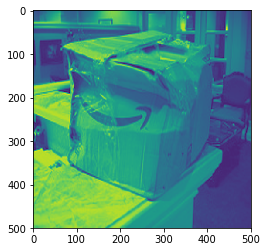

In [220]:
plt.imshow(x_smashed[1].reshape([500,500]));

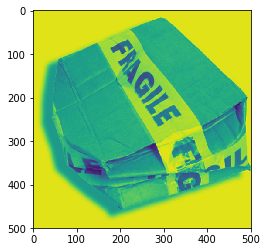

In [221]:
plt.imshow(x_smashed[2].reshape([500,500]));

In [269]:
datalist = list(zip(np.ones(len(x_normal)), x_normal)) + list(zip(np.zeros(len(x_normal)), x_smashed))


In [270]:
import random
train_index = random.sample(list(range(590)),int(np.floor(len(datalist) * 0.75)))

train = [datalist[i] for i in train_index]
test = [datalist[i] for i in range(590) if i not in train_index]

In [284]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)